# You have 2 weeks to analyze the data and propose a ML model to predict whether some employee would leave the company in the next 2 years. 

To do so, you need to produce the following notebooks:
EDA to understand the dataset
ML modeling to find the best model through ML iteration and using pipelines
prediction notebook to load and use the model with new data
All the work should be done in a git repository




Vous avez 2 semaines pour analyser les données et proposer un modèle ML pour prédire si un employé quittera l'entreprise dans les 2 prochaines années.
Pour ce faire, vous devez produire les notebooks suivants:¶
EDA pour comprendre le jeu de données Modélisation ML pour trouver le meilleur modèle par itération ML et en utilisant des pipelines Notebook de prédiction pour charger et utiliser le modèle avec de nouvelles données Tout le travail doit être fait dans un dépôt git.



# NOTEBOOK EDA

In [1]:
# Import Librairie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv("Employee.csv")

In [3]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
# Affiche les 5 lignes 
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df["City"].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [6]:
df["Education"].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [7]:
# taille de nos données (4653 Lignes, 9 Colonnes)
df.shape

(4653, 9)

In [8]:
# imprime des infos sur le datafrme comme le type d'index, les colonnes, les valeurs non-null et la mémoire
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [9]:
# traitement des Valeur manquante, 0 valeur manquante 
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [10]:
df.isnull().values.any()

False

In [11]:
# nous compte le type de valeur (float, object)
df.dtypes.value_counts()

int64     5
object    4
dtype: int64

In [12]:
df['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

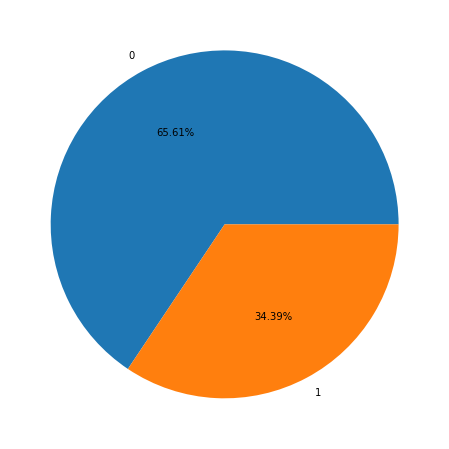

In [13]:
df_value = df['LeaveOrNot'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(df_value,autopct='%1.2f%%',labels=df_value.index)
plt.show()

# Analyse de Fond

In [14]:
# Supprime tout les NaN ('any'supprime la ligne/colonne si TOUTES les valeurs sont NULL )
# df_supp_NaN = df.dropna(how = 'any') 
# df_supp_NaN

# ENCODING

In [15]:
# categ = ['Education','City','Gender','EverBenched']
# le = LabelEncoder()
# df[categ] = df[categ].apply(le.fit_transform)

In [16]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


# Histogrammes des variables communes

In [17]:
# for col in df.select_dtypes('float'):
#     plt.figure()
#     sns.displot(df[col])

# DATA VISUALISATION 

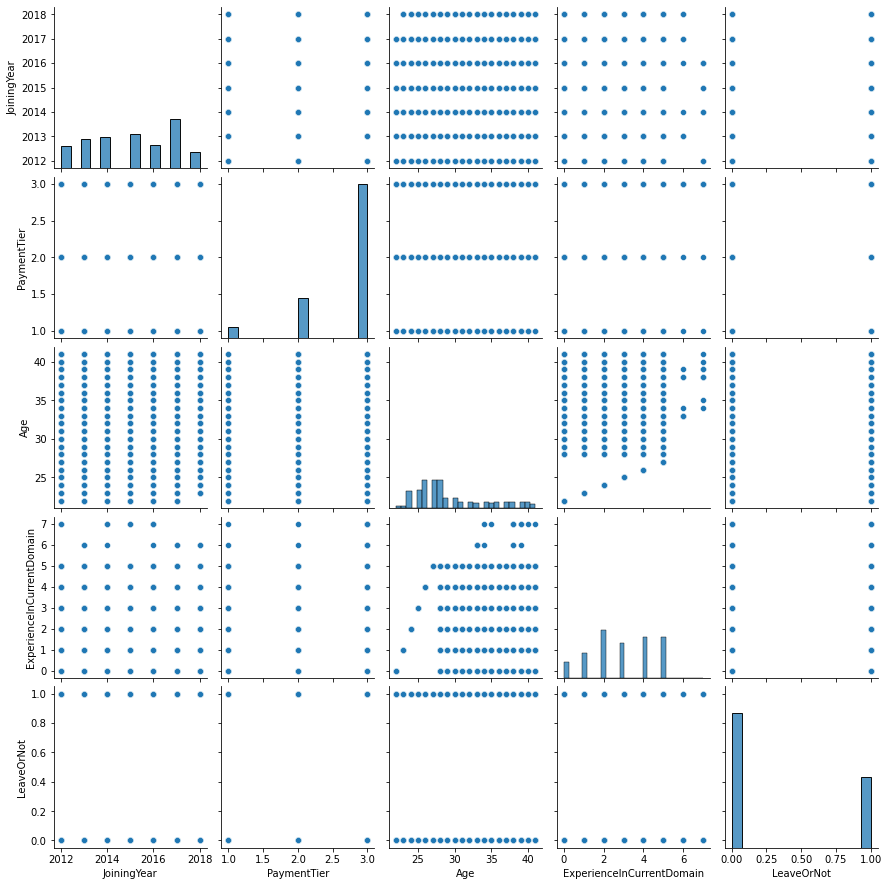

In [18]:
# un graphe qui permet d'avoir une visualisation des données 
sns.pairplot(df)

In [19]:
df['LeaveOrNot']

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

In [20]:
df['Age']

0       34
1       28
2       38
3       27
4       24
        ..
4648    26
4649    37
4650    27
4651    30
4652    33
Name: Age, Length: 4653, dtype: int64

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


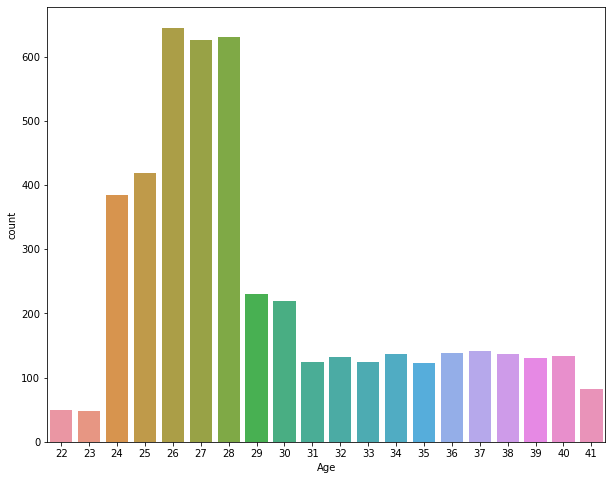

In [21]:
# countplot
plt.figure(figsize=(10,8))
sns.countplot(df['Age'], label='Count') 
plt.show()

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


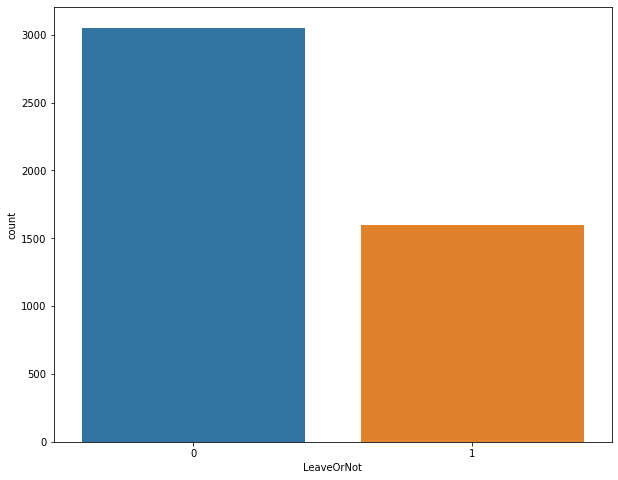

In [22]:
# countplot
plt.figure(figsize=(10,8))
sns.countplot(df['LeaveOrNot'], label='Count') 
plt.show()

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


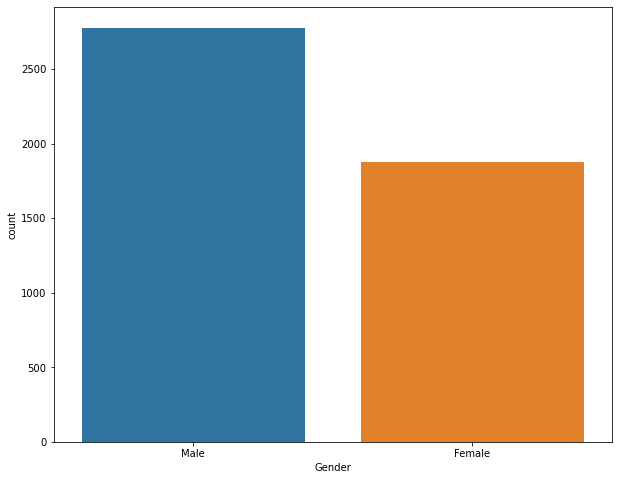

In [23]:
# countplot
plt.figure(figsize=(10,8))
sns.countplot(df['Gender'], label='Count') 
plt.show()

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


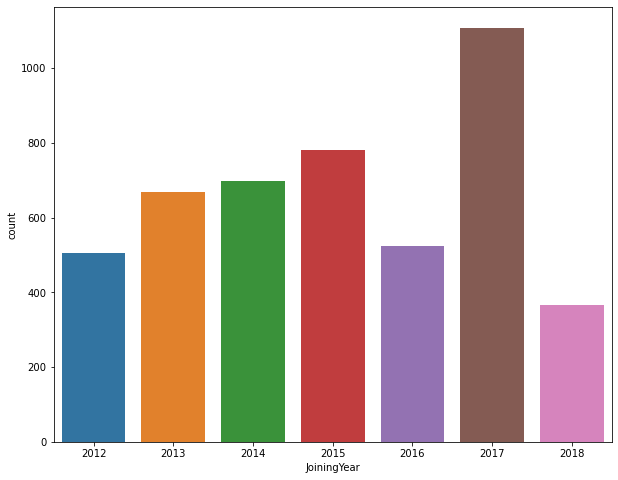

In [24]:
# countplot
plt.figure(figsize=(10,8))
sns.countplot(df['JoiningYear'], label='Count') 
plt.show()

In [25]:
# sns.countplot( x ='Age', hue='LeaveOrNot', date= df, palette = 'colorblind')

# Feature Correlation

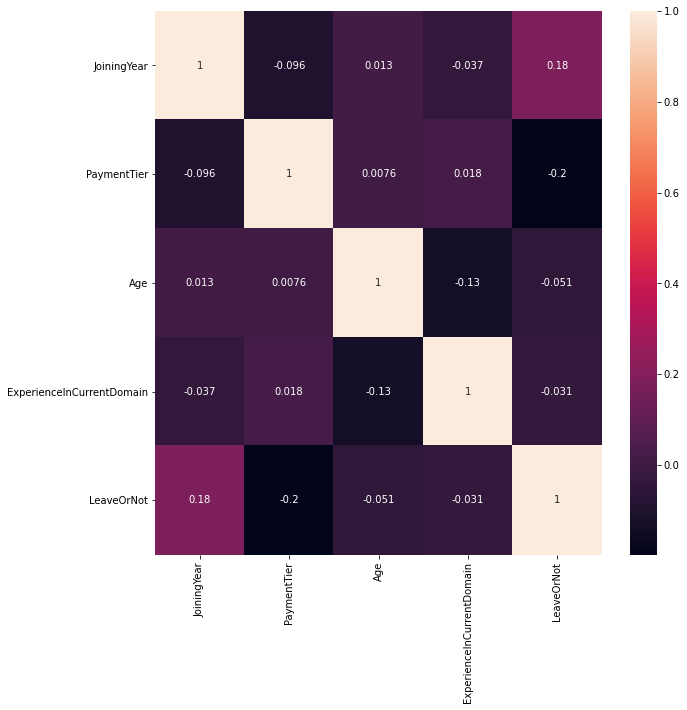

In [26]:
# permet de savoir s'il y a des correlation entre les valeurs
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()


# AUTRE VERSION DE LA HEATMAP

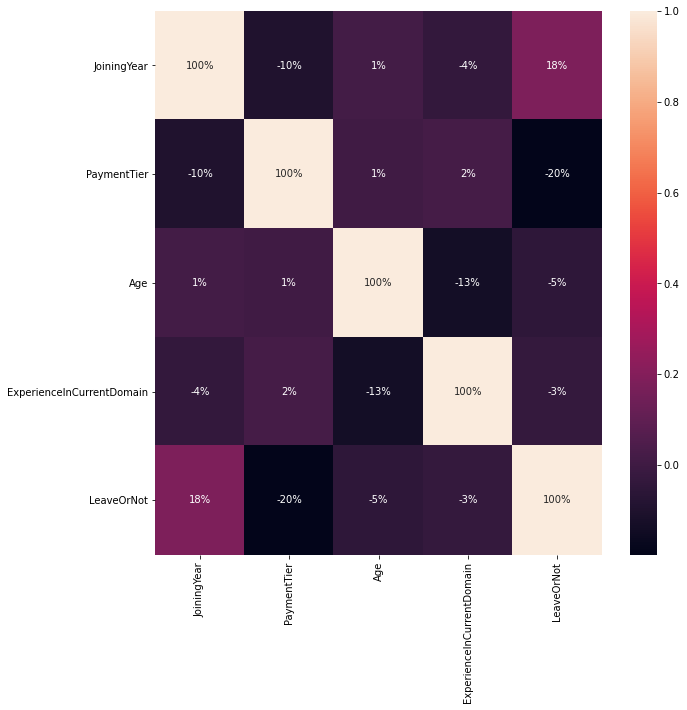

In [27]:
# permet de savoir s'il y a des correlation entre les valeurs
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True ,fmt='.0%')
plt.show()

# OUTLIERS

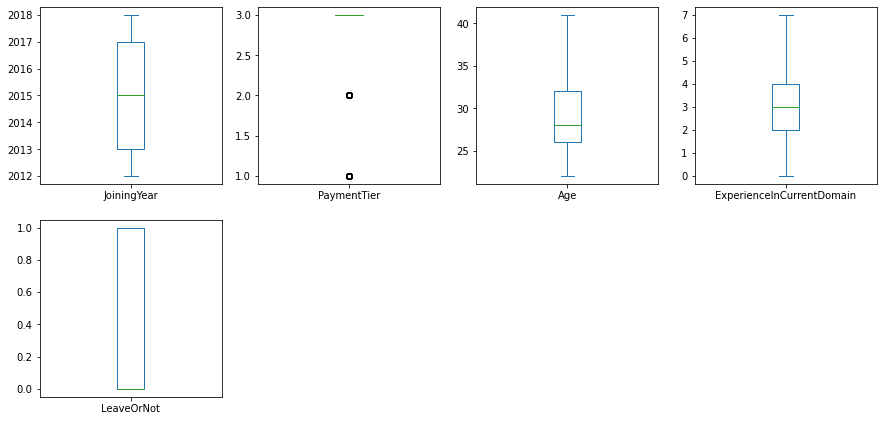

In [28]:
# aucun outliers
df.plot(kind='box', subplots=True, layout=(4, 4), figsize = (15, 15));

In [29]:
# Ce visuel est plus détaillé et lisible 
plt.figure(figsize=(10,10))
df.corr().style.background_gradient(cmap='coolwarm')
plt.show()

<Figure size 720x720 with 0 Axes>

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


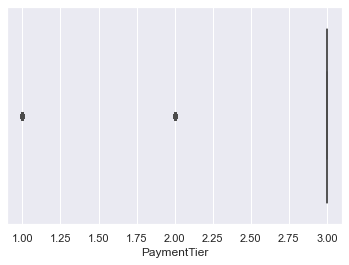

In [30]:
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(6,4)})

sns.boxplot(df.PaymentTier)

plt.show()


# HISTOGRAM

In [31]:
def histogram(df):
    return df.hist(figsize =(15,8))

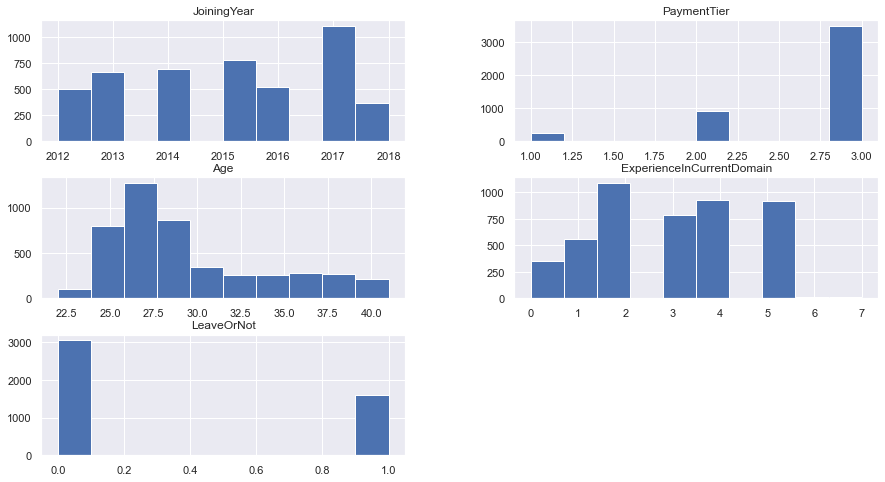

In [32]:
histogram(df);

# HISTOGRAM 2

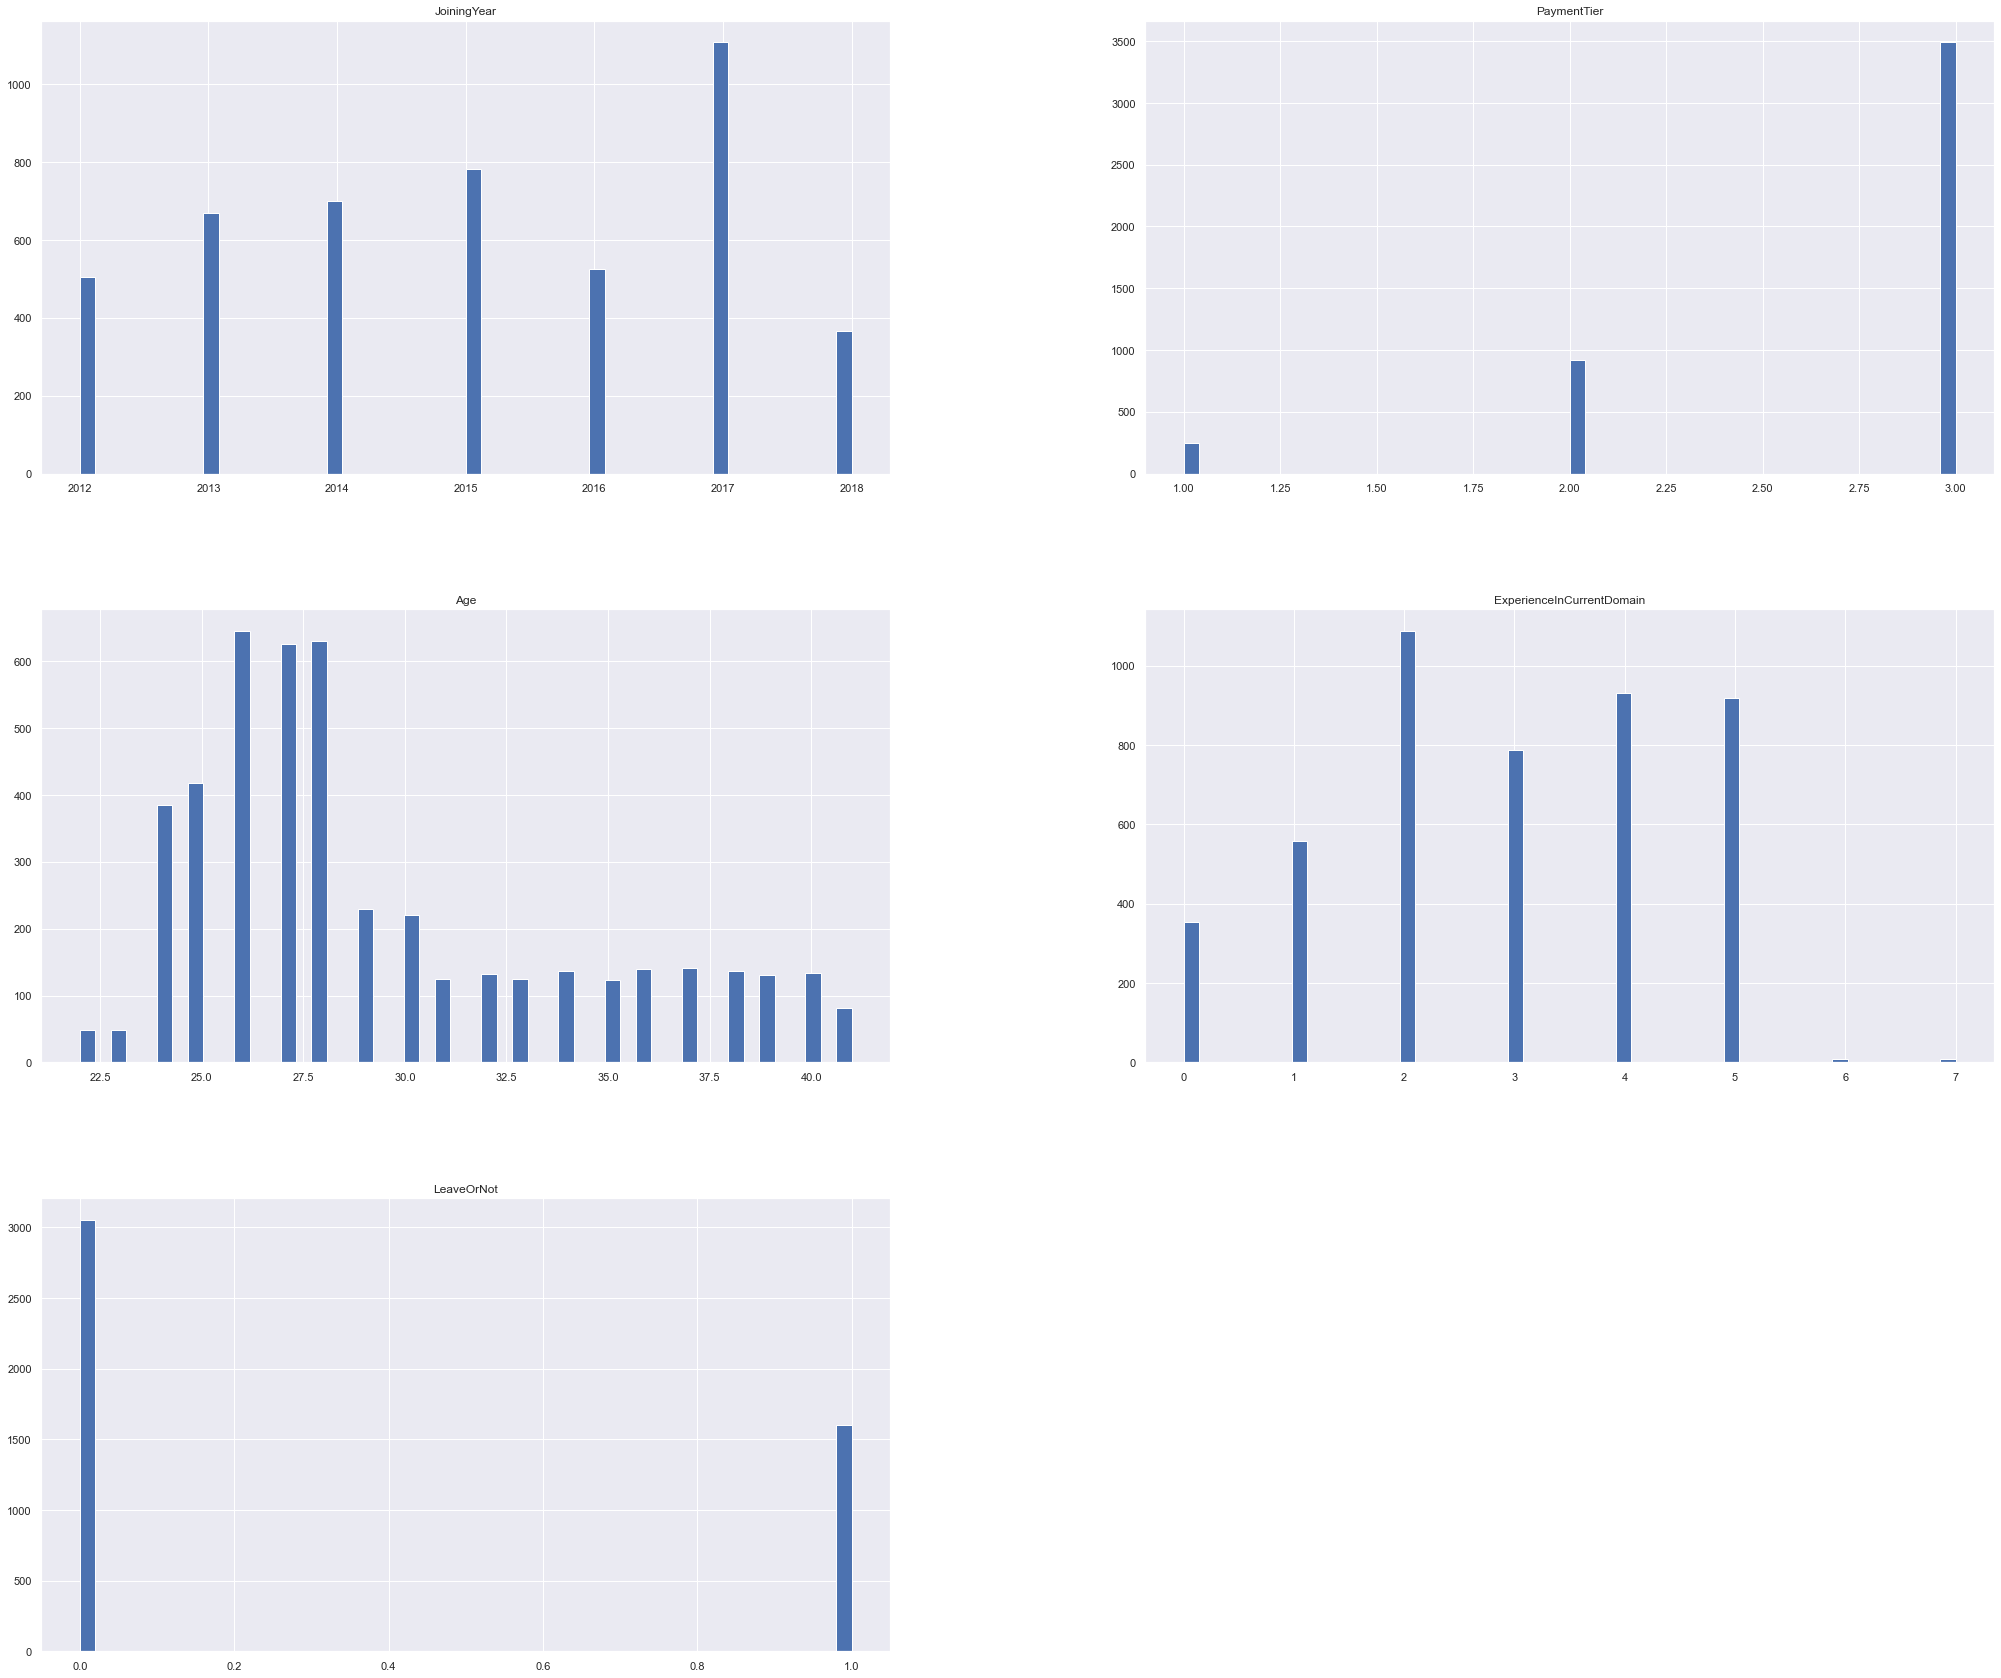

In [33]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

# Encoding

In [35]:
# le = LabelEncoder()
ohe = OneHotEncoder()
# ohe = OneHotEncoder(handle_unknown='ignore')
categ = ['Education','City','Gender','EverBenched']
df[categ] = df[categ].apply(ohe.fit_transform)
df


ValueError: Expected 2D array, got 1D array instead:
array=['Bachelors' 'Bachelors' 'Bachelors' ... 'Masters' 'Bachelors' 'Bachelors'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [40]:
# colonnes categorie pipeline
cat_preprocessing = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

In [41]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [39]:
le = LabelEncoder()
# ohe = OneHotEncoder()
# ohe = OneHotEncoder(handle_unknown='ignore')
categ = ['Education','City','Gender','EverBenched']
df[categ] = df[categ].apply(le.fit_transform)
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [ ]:
# Exporter le fichier csv pour pouvoir le lire 
df.to_csv(r'datadf.csv')